findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were foun

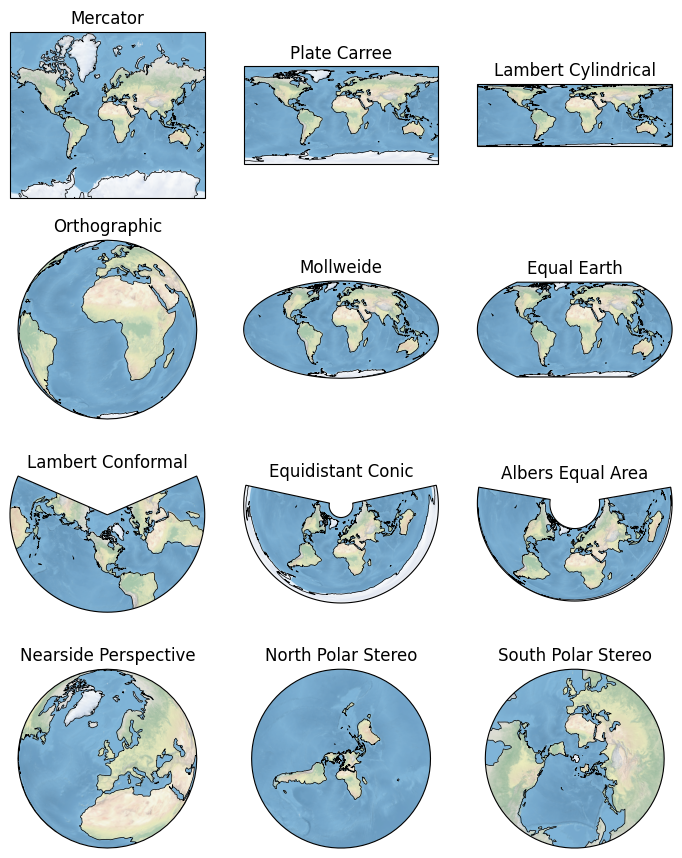

In [3]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs

mpl.rcParams["font.serif"] = "Roboto Slab"
mpl.rcParams["font.size"] = 10
mpl.rcParams["font.weight"] = 400
mpl.rcParams["font.family"] = "serif"

dpi = 100
inch = 2.54
fig_width = 2 * 10.85 / inch
fig_height = fig_width * 1.25

fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

projections = [
    (cartopy.crs.Mercator(), "Mercator",),
    (cartopy.crs.PlateCarree(), "Plate Carree"),
    (cartopy.crs.LambertCylindrical(), "Lambert Cylindrical"),
    (cartopy.crs.Orthographic(), "Orthographic"),
    (cartopy.crs.Mollweide(), "Mollweide"),
    (cartopy.crs.EqualEarth(), "Equal Earth"),
    (cartopy.crs.LambertConformal(), "Lambert Conformal"),
    (cartopy.crs.EquidistantConic(), "Equidistant Conic"),
    (cartopy.crs.AlbersEqualArea(), "Albers Equal Area"),
    (
        cartopy.crs.NearsidePerspective(
            central_latitude=50.72, central_longitude=-3.53, satellite_height=10000000.0
        ),
        "Nearside Perspective",
    ),
    (cartopy.crs.NorthPolarStereo(), "North Polar Stereo"),
    (cartopy.crs.SouthPolarStereo(), "South Polar Stereo"),
]


for i, (projection, name) in enumerate(projections):
    ax = plt.subplot(4, 3, i + 1, projection=projection, frameon="False")
    ax.coastlines(resolution="110m", linewidth=0.5)
    ax.stock_img()
    ax.set_title(name, weight=400)

#plt.savefig("../../figures/scales-projections/geo-projections.png", dpi=300)
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found bec

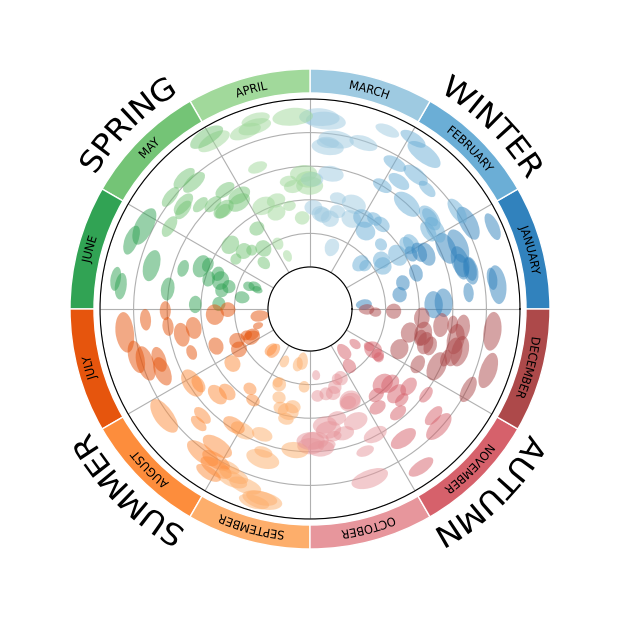

In [4]:
# -----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# -----------------------------------------------------------------------------
# Illustrate the use of polar projection and rotated text (with transformation)
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1], aspect=1)


size = 0.1
vals = np.ones(12)
np.random.seed(123)

# A nice set of colors for seasons
cmap20c = plt.get_cmap("tab20c")
cmap20b = plt.get_cmap("tab20b")
colors = [
    cmap20c(0),
    cmap20c(1),
    cmap20c(2),  # Winter
    cmap20c(10),
    cmap20c(9),
    cmap20c(8),  # Spring
    cmap20c(4),
    cmap20c(5),
    cmap20c(6),  # Summer
    cmap20b(15),
    cmap20b(14),
    cmap20b(13),
]  # Autumn

# Simple pie
ax.pie(np.ones(12), radius=1, colors=colors, wedgeprops=dict(width=size, edgecolor="w"))


# Rotated and transformed label
def label(text, angle, radius=1, scale=0.005):
    path = TextPath((0, 0), text, size=10)
    path.vertices.flags.writeable = True
    V = path.vertices
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()
    V -= (xmin + xmax) / 2, (ymin + ymax) / 2
    V *= scale
    for i in range(len(V)):
        a = angle - V[i, 0]
        V[i, 0] = (radius + V[i, 1]) * np.cos(a)
        V[i, 1] = (radius + V[i, 1]) * np.sin(a)
    patch = PathPatch(path, facecolor="k", linewidth=0)
    ax.add_artist(patch)


# This could be made through a list but it is easier to red this way
label("JANUARY", 0.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("FEBRUARY", 1.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("MARCH", 2.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("WINTER", 1.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("APRIL", 3.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("MAY", 4.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("JUNE", 5.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SPRING", 4.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("JULY", 6.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("AUGUST", 7.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SEPTEMBER", 8.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("SUMMER", 7.5 * 2 * np.pi / 12, 1 + size, 0.0125)

label("OCTOBER", 9.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("NOVEMBER", 10.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("DECEMBER", 11.5 * 2 * np.pi / 12, 1 - 0.5 * size)
label("AUTUMN", 10.5 * 2 * np.pi / 12, 1 + size, 0.0125)


# Add a polar projection on top of the previous one
ax = fig.add_axes([0.15, 0.15, 0.7, 0.7], projection="polar")

# Some ellipses that will enforce polar projection
for i in range(250):
    p = np.random.uniform(0, 2 * np.pi), np.random.uniform(0.05, 0.95)
    w = h = 0.01 + 0.05 * np.random.uniform(1, 2)
    color = colors[int(np.floor((p[0] / (2 * np.pi)) * 12))]
    ellipse = Ellipse(
        p,
        width=2 * w,
        height=h,
        zorder=10,
        facecolor=color,
        edgecolor="none",
        alpha=0.5,
    )
    ax.add_artist(ellipse)
ax.set_xlim(0, 2 * np.pi)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels([])
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([])
ax.set_rorigin(-0.25)


# Save results and show it
#plt.savefig("../../figures/scales-projections/text-polar.pdf")
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab
findfont: Generic family 'serif' not found because none of the following families were found: Roboto Slab


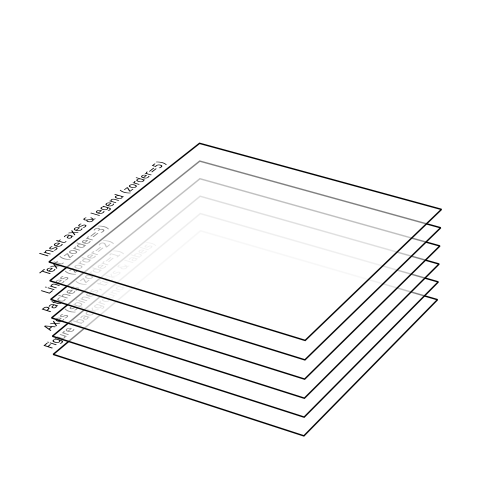

In [5]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle, PathPatch


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        x, y, z = x, z, y
    elif zdir == "x":
        x, y, z = y, z, x
    else:
        x, y, z = x, y, z
    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(x, y)
    p = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)


fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection="3d", xticks=[], yticks=[], zticks=[])
ax.set_axis_off()
ax.set_xlim(0, 10), ax.set_ylim(0, 10), ax.set_zlim(0, 10)
for i, text in enumerate(
    [
        "Figure (background)",
        "Axes (spines, ticks & labels)",
        "Patches (zorder=1)",
        "Lines (zorder=2)",
        "Text (zorder=3)",
        "Inset axes & legend (zorder=5)",
    ]
):

    p = Rectangle((0, 0), 10, 10, edgecolor="None", facecolor="white", alpha=0.5)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    p = Rectangle((0, 0), 10, 10, edgecolor="black", facecolor="None")
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    text3d(
        ax,
        (-0.25, 0.25, i),
        text,
        zdir="z",
        size=0.5,
        angle=np.pi / 2,
        ec="none",
        fc="k",
    )

#plt.savefig("../../figures/anatomy/zorder.pdf")
plt.show()